# Tarefa 1: Aprendizado Supervisionado

**Autor**: Matheus Jericó Palhares <br>
**LinkedIn**: https://linkedin.com/in/matheusjerico <br>
**Github**: https://github.com/matheusjerico

### 2) Tarefa 2: implementar a função “predict_KNN(pontos, ponto)”, que recebe o conjunto de treinamento e o ponto cuja classe será predita, porém, aqui, você realizará uma regressão. Considere as features como sendo apenas age e chol, tendo thalach como o alvo da regressão. Esta tarefa deve ser realizada nos dois datasets fornecidos.

- Para a tarefa 2: um scatter plot mostrando os pontos de treinamento, os pontos que estão sendo preditos, um código de cores intuitivo que diferencie os pontos preditos dos pontos de treinamento e o erro total médio.
- Compare os seus resultados com os obtidos através do sklearn.neighbors.KNeighborsClassifier e do sklearn.neighbors.KNeighborsRegressor. Os seus resultados e os resultados do sklearn deveriam ser iguais.

### Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import operator
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

## Tarefa 1 - Dataset Heart

### 1. Carregando dados

In [2]:
dataset = pd.read_csv("./Dataset/heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Selecionando colunas

In [3]:
dataset = dataset[['age', 'chol', 'thalach']]

In [4]:
dataset.head()

,age,chol,thalach
0,63,233,150
1,37,250,187
2,41,204,172
3,56,236,178
4,57,354,163


In [5]:
dataset.rename(columns={'thalach':'target'}, inplace = True)

### 3. Criando classe do KNN

In [6]:
class kNN:
    def __init__(self, pontos, target, k=3):
        self.pontos = pontos
        self.target = target
        self.k = k
        
    def dist(self, a, b):
        return np.linalg.norm(np.array(a) - np.array(b))
    
    def predict(self, ponto):
        dists = []
        for i in range(len(self.pontos)):
            if ponto == self.pontos[i]:
                continue

            dists.append([self.dist(ponto, self.pontos[i]), self.target[i]])
        
        dists.sort()

        return np.array(dists)[:self.k, 1].mean()

### 4. DIvidindo dados 

In [7]:
def train_test_split(dataset, test_size=0.3, random_state=0):
    np.random.seed(random_state)
    _dataset = np.array(dataset)
    np.random.shuffle(_dataset)
    
    threshold = int(_dataset.shape[0] * test_size)
    X_test = _dataset[:threshold, :-1]
    Y_test = _dataset[:threshold, -1]
    X_train = _dataset[threshold:, :-1]
    Y_train = _dataset[threshold:, -1]
    
    return X_train, X_test, Y_train, Y_test


In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset, test_size=0.3, random_state=7)

### 5. Visualizando Graficamente

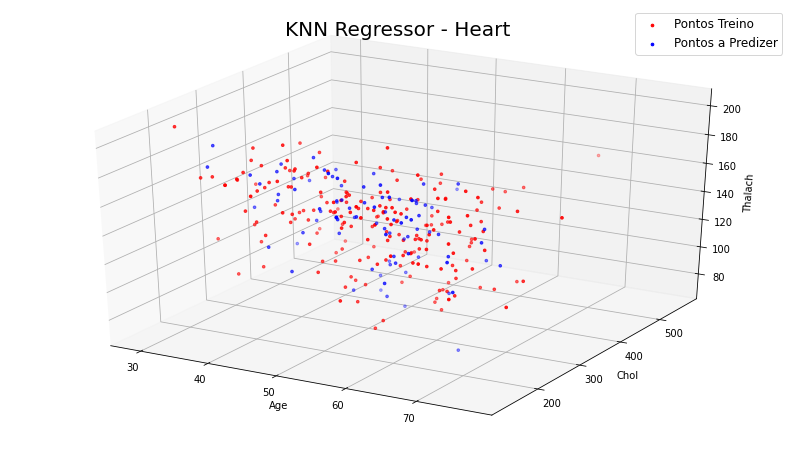

In [9]:
df_train = pd.concat([pd.DataFrame(X_train, columns=['age','chol']),
                      pd.DataFrame(y_train, columns=['target'])],
                     axis=1)

df_test = pd.concat([pd.DataFrame(X_test, columns=['age','chol']),
                     pd.DataFrame(y_test, columns=['target'])],
                    axis=1)

fig = plt.figure(figsize=[14,8])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_train['age'], df_train['chol'], df_train['target'], s=7, c='r', label='Pontos Treino')
ax.scatter(df_test['age'], df_test['chol'], df_test['target'], s=7, c='b', label='Pontos a Predizer')

ax.set_title('KNN Regressor - Heart', fontdict={'fontsize': 20})
ax.set_xlabel('Age', fontdict={'fontsize': 10})
ax.set_ylabel('Chol', fontdict={'fontsize': 10})
ax.set_zlabel('Thalach', fontdict={'fontsize': 10})
_ = ax.legend(fontsize=12)

### 6. Comparando modelos 

In [10]:
# Preparando dados
X_train = list(zip(X_train[:, 0], X_train[:, 1]))
X_test = list(zip(X_test[:, 0], X_test[:, 1]))

In [11]:
# Predição utilizando o algoritimo criado
knn = kNN(X_train, y_train, k=7)

preds = []
for i in range(len(X_test)):
    preds.append(knn.predict(X_test[i]))

rmse = mean_squared_error(y_test, preds, squared=False)
mse = mean_squared_error(y_test, preds)
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MSE: 491.35986394557824
RMSE: 22.166638535095444


In [12]:
knn_sklearn = KNeighborsRegressor(n_neighbors=7)
knn_sklearn.fit(X_train, y_train)
preds_sk = knn_sklearn.predict(X_test)

rmse = mean_squared_error(y_test, preds_sk, squared=False)
mse = mean_squared_error(y_test, preds_sk)
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MSE: 492.9746031746032
RMSE: 22.203031396063988


## Tarefa 2 - Dataset Covid

### 1. Carregando dados

In [13]:
dataset = pd.read_csv("./Dataset/base-covid-19-us.csv")
dataset.head()

,county,cases,deaths
0,Abbeville,84,0
1,Acadia,741,21
2,Accomack,116,0
3,Ada,4264,41
4,Adair,325,8


In [14]:
dataset = dataset[['cases','deaths']]

In [15]:
dataset.head()

,cases,deaths
0,84,0
1,741,21
2,116,0
3,4264,41
4,325,8


### 2. Separando dados de teste e treino

In [16]:
X_train, X_test, y_train, y_test = train_test_split(dataset, test_size=0.3, random_state=7)

### 3. Visualizando graficamente

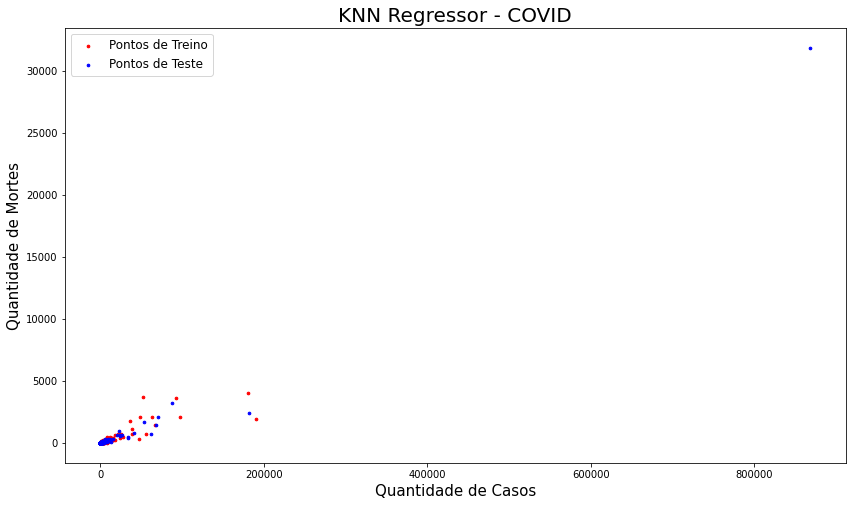

In [17]:
fig = plt.figure(figsize=[14,8])
ax = fig.add_subplot(111)

ax.scatter(X_train, y_train, s=7, c='red', label='Pontos de Treino')
ax.scatter(X_test, y_test, s=7, c='blue', label='Pontos de Teste')

ax.set_title('KNN Regressor - COVID', fontdict={'fontsize': 20})
ax.set_xlabel('Quantidade de Casos', fontdict={'fontsize': 15})
ax.set_ylabel('Quantidade de Mortes', fontdict={'fontsize': 15})
_ = ax.legend(fontsize=12)

### 4. Comparando resultados entre os modelos

In [18]:
# Predição utilizando o algoritimo criado
knn = kNN(X_train, y_train, k=7)

preds = []
for i in range(len(X_test)):
    preds.append(knn.predict(X_test[i]))

rmse = mean_squared_error(y_test, preds, squared=False)
mse = mean_squared_error(y_test, preds)
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MSE: 1868077.823389228
RMSE: 1366.7764350431376


In [19]:
knn_sklearn = KNeighborsRegressor(n_neighbors=7)
knn_sklearn.fit(X_train, y_train)
preds_sk = knn_sklearn.predict(X_test)

rmse = mean_squared_error(y_test, preds_sk, squared=False)
mse = mean_squared_error(y_test, preds_sk)
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MSE: 1868079.366263703
RMSE: 1366.776999463959


### 5. Visualizando graficamente as predições

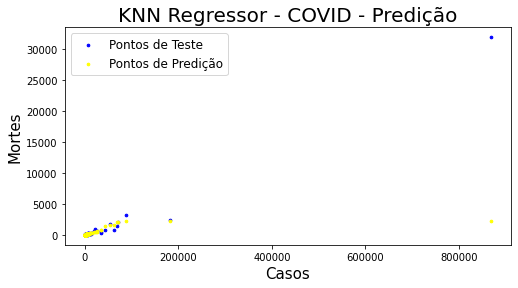

In [20]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)

ax.scatter(X_test, y_test, s=7, c='blue', label='Pontos de Teste')
ax.scatter(X_test, preds, s=7, c='yellow', label='Pontos de Predição')

ax.set_title('KNN Regressor - COVID - Predição', fontdict={'fontsize': 20})
ax.set_xlabel('Casos', fontdict={'fontsize': 15})
ax.set_ylabel('Mortes', fontdict={'fontsize': 15})
_ = ax.legend(fontsize=12)